# Documents (Reimplementation)

#### Reference API Documents
 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [1]:
import pandas as pd
import numpy as np

# 021. pandas.DataFrame.all

In [11]:
pd.Series([True,True]).all()

True

In [12]:
pd.Series([True,False]).all()

False

In [13]:
pd.Series([]).all()

True

In [16]:
pd.Series([np.nan]).all()

True

In [17]:
pd.Series([np.nan]).all(skipna=True) # true가 default

True

In [15]:
pd.Series([np.nan]).all(skipna=False)

True

# 022. pandas.DataFrame.any

In [3]:
pd.Series([False,False]).any()

False

In [4]:
pd.Series([True,False]).any()

True

In [5]:
pd.Series([]).any()

C:\Users\good-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


False

In [6]:
pd.Series([np.nan]).any()

False

In [7]:
pd.Series([np.nan]).any(skipna=False)

True

In [8]:
df = pd.DataFrame({"A":[1,2],
                   "B":[0,2],
                   "C":[0,0]})
df

A  B  C
0  1  0  0
1  2  2  0

In [9]:
df.any()

A     True
B     True
C    False
dtype: bool

In [10]:
df = pd.DataFrame({"A":[True, False], 
                   "B":[1,2]})
df

A  B
0   True  1
1  False  2

In [12]:
df.any(axis='columns')

0    True
1    True
dtype: bool

In [13]:
df = pd.DataFrame({"A" : [True,False],
                   "B" : [1,0]})
df

A  B
0   True  1
1  False  0

In [14]:
df.any(axis='columns')

0     True
1    False
dtype: bool

In [15]:
df.any(axis=None)

True

In [16]:
pd.DataFrame([]).any()

Series([], dtype: bool)

# 023. pandas.DataFrame.append

In [18]:
df = pd.DataFrame([  [1,2], [3,4]  ],
                  columns=list('AB'))
df

A  B
0  1  2
1  3  4

In [19]:
df2 = pd.DataFrame([  [5,6], [7,8]],
                   columns=list('AB'))
df2

A  B
0  5  6
1  7  8

In [20]:
df.append(df2, ignore_index=True)

A  B
0  1  2
1  3  4
2  5  6
3  7  8

In [21]:
df = pd.DataFrame(columns=['A'])
for i in range(5):
    df = df.append({'A':i}, ignore_index=True)
df

A
0  0
1  1
2  2
3  3
4  4

In [22]:
# more efficient

pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],
          ignore_index=True)

A
0  0
1  1
2  2
3  3
4  4

# 024. pandas.DataFrame.apply

In [2]:
df = pd.DataFrame([[4,9]]*3, 
                  columns=['A','B'])
df

A  B
0  4  9
1  4  9
2  4  9

In [3]:
df.apply(np.sqrt)

A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0

In [4]:
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

In [5]:
df.apply(np.sum,axis=1)

0    13
1    13
2    13
dtype: int64

In [6]:
df.apply(lambda x: [1,2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [7]:
df.apply(lambda x : [1,2], axis=1, result_type='expand')

0  1
0  1  2
1  1  2
2  1  2

In [8]:
df.apply(lambda x: pd.Series([1,2], index=['foo','bar']), axis=1)

foo  bar
0    1    2
1    1    2
2    1    2

In [9]:
df.apply(lambda x: [1,2], axis=1, result_type='broadcast')

A  B
0  1  2
1  1  2
2  1  2

# 025. pandas.DataFrame.applymap

In [2]:
df = pd.DataFrame([[1,2.12],
                   [3.356, 4.567]])
df

0      1
0  1.000  2.120
1  3.356  4.567

In [3]:
df.applymap(lambda x : len(str(x)))

0  1
0  3  4
1  5  5

In [4]:
df.applymap(lambda x:x**2)

0          1
0   1.000000   4.494400
1  11.262736  20.857489

In [5]:
df ** 2

0          1
0   1.000000   4.494400
1  11.262736  20.857489

# 026. pandas.DataFrame.asfreq

In [3]:
index = pd.date_range('1/1/2000', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s':series})
df

s
2000-01-01 00:00:00  0.0
2000-01-01 00:01:00  NaN
2000-01-01 00:02:00  2.0
2000-01-01 00:03:00  3.0

In [5]:
df.asfreq(freq='30S')

s
2000-01-01 00:00:00  0.0
2000-01-01 00:00:30  NaN
2000-01-01 00:01:00  NaN
2000-01-01 00:01:30  NaN
2000-01-01 00:02:00  2.0
2000-01-01 00:02:30  NaN
2000-01-01 00:03:00  3.0

In [6]:
df.asfreq(freq='30S', fill_value=9.0)

s
2000-01-01 00:00:00  0.0
2000-01-01 00:00:30  9.0
2000-01-01 00:01:00  NaN
2000-01-01 00:01:30  9.0
2000-01-01 00:02:00  2.0
2000-01-01 00:02:30  9.0
2000-01-01 00:03:00  3.0

In [7]:
df.asfreq(freq='30S', method='bfill')

s
2000-01-01 00:00:00  0.0
2000-01-01 00:00:30  NaN
2000-01-01 00:01:00  NaN
2000-01-01 00:01:30  2.0
2000-01-01 00:02:00  2.0
2000-01-01 00:02:30  3.0
2000-01-01 00:03:00  3.0

# 027. pandas.DataFrame.asof
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asof.html

In [3]:
s = pd.Series([1,2,np.nan,4], index=[10,20,30,40])
s

10    1.0
20    2.0
30    NaN
40    4.0
dtype: float64

In [4]:
s.asof(20)

2.0

In [5]:
s.asof([5,20])

5     NaN
20    2.0
dtype: float64

In [6]:
s.asof(30)

2.0

In [3]:
df = pd.DataFrame({'a':[10,20,30,40,50],
                   'b':[None, None, None, None, 500]},
                   index = pd.DatetimeIndex(['2018-02-27 09:01:00',
                                             '2018-02-27 09:02:00',
                                             '2018-02-27 09:03:00',
                                             '2018-02-27 09:04:00',
                                             '2018-02-27 09:05:00']))
df

a      b
2018-02-27 09:01:00  10    NaN
2018-02-27 09:02:00  20    NaN
2018-02-27 09:03:00  30    NaN
2018-02-27 09:04:00  40    NaN
2018-02-27 09:05:00  50  500.0

In [4]:
df.asof(pd.DatetimeIndex(['2018-02-27 09:03:30',
                          '2018-02-27 09:04:30']))

a   b
2018-02-27 09:03:30 NaN NaN
2018-02-27 09:04:30 NaN NaN

In [5]:
df.asof(pd.DatetimeIndex(['2018-02-27 09:03:30',
                          '2018-02-27 09:04:30']),
        subset=['a'])

a   b
2018-02-27 09:03:30  30.0 NaN
2018-02-27 09:04:30  40.0 NaN

# 028. pandas.DataFrame.assign

In [3]:
df = pd.DataFrame({'temp_c' : [17.0, 25.0]},
                  index = ['Portland', 'Berkeley'])
df

temp_c
Portland    17.0
Berkeley    25.0

In [4]:
df.assign(temp_f = lambda x: x.temp_c * 9 /5 + 32)

temp_c  temp_f
Portland    17.0    62.6
Berkeley    25.0    77.0

In [5]:
df.assign(temp_f=df['temp_c']*9/5+32)

temp_c  temp_f
Portland    17.0    62.6
Berkeley    25.0    77.0

In [7]:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
          temp_k=lambda x: (x['temp_f'] + 459.67) * 5 / 9)

temp_c  temp_f  temp_k
Portland    17.0    62.6  290.15
Berkeley    25.0    77.0  298.15

# 029. pandas.DataFrame.astype

In [8]:
d = {'col1':[1,2], 'col2':[3,4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [9]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

In [10]:
df.astype({'col1':'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [12]:
ser = pd.Series([1,2], dtype='int32')
ser

0    1
1    2
dtype: int32

In [13]:
ser.astype('int64')

0    1
1    2
dtype: int64

In [15]:
ser.astype('category')

0    1
1    2
dtype: category
Categories (2, int64): [1, 2]

In [16]:
cat_dtype = pd.api.types.CategoricalDtype(categories=[2,1], ordered=True)
ser.astype(cat_dtype)

0    1
1    2
dtype: category
Categories (2, int64): [2 < 1]

In [2]:
s1 = pd.Series([1,2])
s2 = s1.astype('int64', copy=False)
s2[0] = 10
s1

0    10
1     2
dtype: int64

# 030. pandas.DataFrame.at_time

In [3]:
i = pd.date_range('2018-04-09', periods=4, freq='12H')
i

DatetimeIndex(['2018-04-09 00:00:00', '2018-04-09 12:00:00',
               '2018-04-10 00:00:00', '2018-04-10 12:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [4]:
ts = pd.DataFrame({'A':[1,2,3,4]},
                  index=i)
ts

A
2018-04-09 00:00:00  1
2018-04-09 12:00:00  2
2018-04-10 00:00:00  3
2018-04-10 12:00:00  4

# 031. pandas.DataFrame.between_time

In [2]:
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
i

DatetimeIndex(['2018-04-09 00:00:00', '2018-04-10 00:20:00',
               '2018-04-11 00:40:00', '2018-04-12 01:00:00'],
              dtype='datetime64[ns]', freq='1460T')

In [3]:
ts = pd.DataFrame({'A':[1,2,3,4]}, index=i)
ts

A
2018-04-09 00:00:00  1
2018-04-10 00:20:00  2
2018-04-11 00:40:00  3
2018-04-12 01:00:00  4

In [4]:
ts.between_time('0:15', '0:45')

A
2018-04-10 00:20:00  2
2018-04-11 00:40:00  3

In [5]:
ts.between_time('0:45','0:15')

A
2018-04-09 00:00:00  1
2018-04-12 01:00:00  4

# 032. pandas.DataFrame.boxplot

In [1]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4), 
                  columns=['Col1','Col2','Col3','Col4'])
df

Col1      Col2      Col3      Col4
0  0.471435 -1.190976  1.432707 -0.312652
1 -0.720589  0.887163  0.859588 -0.636524
2  0.015696 -2.242685  1.150036  0.991946
3  0.953324 -2.021255 -0.334077  0.002118
4  0.405453  0.289092  1.321158 -1.546906
5 -0.202646 -0.655969  0.193421  0.553439
6  1.318152 -0.469305  0.675554 -1.817027
7 -0.183109  1.058969 -0.397840  0.337438
8  1.047579  1.045938  0.863717 -0.122092
9  0.124713 -0.322795  0.841675  2.390961

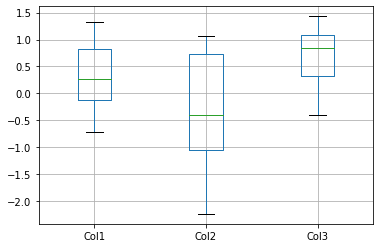

In [3]:
boxplot = df.boxplot(column=['Col1','Col2','Col3'])

In [4]:
df = pd.DataFrame(np.random.randn(10,2),
                  columns=['Col1','Col2'])
df['X'] = pd.Series(['A','A','A','A','A',
                     'B','B','B','B','B'])
df

Col1      Col2  X
0  0.076200 -0.566446  A
1  0.036142 -2.074978  A
2  0.247792 -0.897157  A
3 -0.136795  0.018289  A
4  0.755414  0.215269  A
5  0.841009 -1.445810  B
6 -1.401973 -0.100918  B
7 -0.548242 -0.144620  B
8  0.354020 -0.035513  B
9  0.565738  1.545659  B

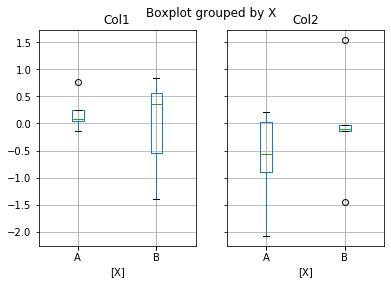

In [5]:
boxplot = df.boxplot(by='X')

In [6]:
df = pd.DataFrame(np.random.randn(10,3),
                  columns=['Col1','Col2','Col3'])
df['X'] = pd.Series(['A','A','A','A','A',
                     'B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','B',
                     'B','A','B','A','B'])
df

Col1      Col2      Col3  X  Y
0 -0.974236 -0.070345  0.307969  A  A
1 -0.208499  1.033801 -2.400454  A  B
2  2.030604 -1.142631  0.211883  A  A
3  0.704721 -0.785435  0.462060  A  B
4  0.704228  0.523508 -0.926254  A  B
5  2.007843  0.226963 -1.152659  B  B
6  0.631979  0.039513  0.464392  B  A
7 -3.563517  1.321106  0.152631  B  B
8  0.164530 -0.430096  0.767369  B  A
9  0.984920  0.270836  1.391986  B  B

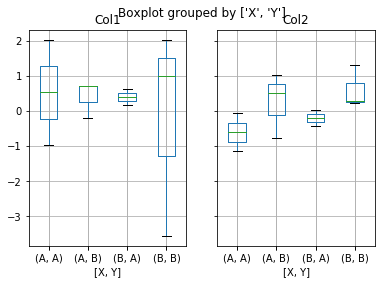

In [7]:
boxplot = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

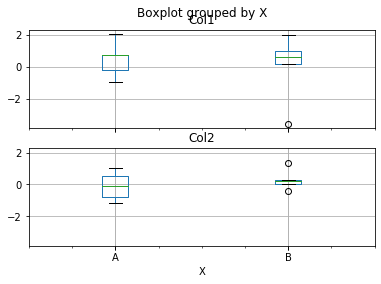

In [8]:
boxplot = df.boxplot(column=['Col1','Col2'], by='X',
                     layout=(2,1))

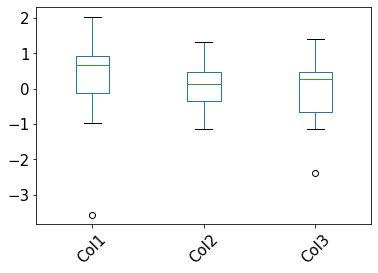

In [9]:
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)

matplotlib.axes._subplots.AxesSubplot

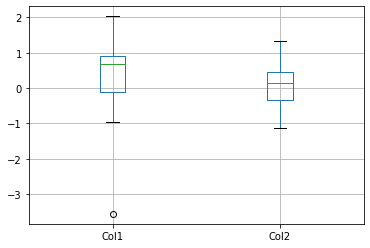

In [10]:
boxplot = df.boxplot(column=['Col1','Col2'], 
                     return_type='axes')
type(boxplot)

numpy.ndarray

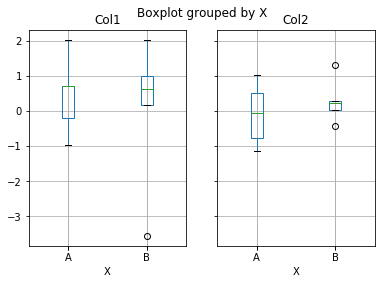

In [11]:
boxplot = df.boxplot(column=['Col1','Col2'], by='X',
                     return_type=None)
type(boxplot)

numpy.ndarray

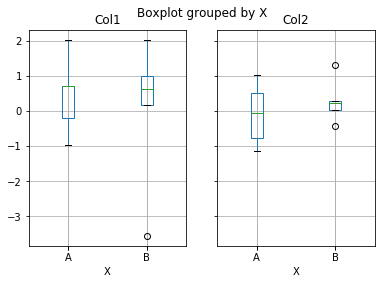

In [12]:
boxplot = df.boxplot(column=['Col1', 'Col2'], by='X',
                    return_type=None)
type(boxplot)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html

In [19]:
import pandas as pd
import numpy as np

In [ ]:
# df = ...
# df.reset_index(drop=True)

# Etc

In [9]:
import pandas as pd
import numpy as np

In [14]:
sales = {'account' : ['Kim', 'Song', 'Noh', 'Ho'],
         'Jan' : [150, 200, 70, np.NaN],
         'Feb' : [200, 210, 90, 100],
         'Mar' : [140, np.NaN, 215, 95]}
df_orig = pd.DataFrame.from_dict(sales)
df = df_orig.copy()
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

### rename columns / index

In [4]:
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

In [5]:
df_new = df.rename(columns={'account':'name', 'Mar':'May'}, index={0:'zero'})
df_new

name    Jan  Feb    May
zero   Kim  150.0  200  140.0
1     Song  200.0  210    NaN
2      Noh   70.0   90  215.0
3       Ho    NaN  100   95.0

### rename columns/rows of original object

In [6]:
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

In [7]:
df2 = df.copy()
df2

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

In [8]:
df2.rename(columns={'account':'name', 'Mar':'May'}, index={0:'zero'}, inplace=True)
df2

name    Jan  Feb    May
zero   Kim  150.0  200  140.0
1     Song  200.0  210    NaN
2      Noh   70.0   90  215.0
3       Ho    NaN  100   95.0

### Drop Columns

#### 1. drop rows including null value

In [9]:
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

In [10]:
df_new2 = df.dropna(axis=0)   # drop rows which has null value
df_new2

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
2     Noh   70.0   90  215.0

#### 2. drop columns including null value

In [11]:
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

In [12]:
df_new3 = df.dropna(axis=1)   # drop columns which has null value
df_new3

account  Feb
0     Kim  200
1    Song  210
2     Noh   90
3      Ho  100

## lambda

In [15]:
df

account    Jan  Feb    Mar
0     Kim  150.0  200  140.0
1    Song  200.0  210    NaN
2     Noh   70.0   90  215.0
3      Ho    NaN  100   95.0

#### lambda  / True/False Tag column

In [16]:
df['new_col'] = df['account'].apply(lambda x : True if (x in ['Kim','Ho']) else False)
df

account    Jan  Feb    Mar  new_col
0     Kim  150.0  200  140.0     True
1    Song  200.0  210    NaN    False
2     Noh   70.0   90  215.0    False
3      Ho    NaN  100   95.0     True

#### lambda / testing function

In [17]:
test = lambda x : True if (x > 10 and x < 20) else False
test(12)

True

### Using if else in Lambda function
lambda (arguments) : (Return value if condition is True) if (condition) else

In [24]:
user_defined_function_01 = lambda x : True if (x>10 and x<20) else False
user_defined_function_01(17)

True

### scalar 'to_replace' and 'value'

In [2]:
import pandas as pd
s = pd.Series([0, 1, 2, 3, 4])
s.replace(0, 5)

0    5
1    1
2    2
3    3
4    4
dtype: int64

In [3]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df.replace(0, 5)

A  B  C
0  5  5  a
1  1  6  b
2  2  7  c
3  3  8  d
4  4  9  e

### List-like 'to_replace'

In [5]:
df.replace([0, 1, 2, 3], 4)

A  B  C
0  4  5  a
1  4  6  b
2  4  7  c
3  4  8  d
4  4  9  e

In [6]:
df.replace([0, 1, 2, 3], [4, 3, 2, 1])

A  B  C
0  4  5  a
1  3  6  b
2  2  7  c
3  1  8  d
4  4  9  e

In [7]:
s.replace([1, 2], method='bfill')

0    0
1    3
2    3
3    3
4    4
dtype: int64

In [9]:
df.replace({0: 10, 1: 100})

A  B  C
0   10  5  a
1  100  6  b
2    2  7  c
3    3  8  d
4    4  9  e

### Regular expression 'to_replace'

In [10]:
df = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                   'B': ['abc', 'bar', 'xyz']})
df.replace(to_replace=r'^ba.$', value='new', regex=True)

A    B
0   new  abc
1   foo  new
2  bait  xyz

In [11]:
df.replace({'A': r'^ba.$'}, {'A': 'new'}, regex=True)

A    B
0   new  abc
1   foo  bar
2  bait  xyz

In [12]:
df.replace(regex=r'^ba.$', value='new')

A    B
0   new  abc
1   foo  new
2  bait  xyz

In [13]:
df.replace(regex={r'^ba.$': 'new', 'foo': 'xyz'})

A    B
0   new  abc
1   xyz  new
2  bait  xyz

In [14]:
df.replace(regex=[r'^ba.$', 'foo'], value='new')

A    B
0   new  abc
1   new  new
2  bait  xyz

In [17]:
s = pd.Series([10, 'a', 'a', 'b', 'a'])
print(s)
print('-------------------------')
s.replace({'a': None})
print(s)

0    10
1     a
2     a
3     b
4     a
dtype: object
-------------------------
0    10
1     a
2     a
3     b
4     a
dtype: object


In [19]:
s = pd.Series([10, 'a', 'a', 'b', 'a'])
print(s)
print('-------------------------')
s.replace('a', None)
print(s)

0    10
1     a
2     a
3     b
4     a
dtype: object
-------------------------
0    10
1     a
2     a
3     b
4     a
dtype: object
